$\underline{\Huge{\textbf {Additional Machine Learning Models}}}$

The following code creates two models for the housing prices utilizing two different methods: Gaussian Naive-Bayes and Ridge Regression.

$\underline{\large{\textbf {Import Needed Libraries}}}$

In [1]:
#General Imports
from itertools import compress
import pandas as pd
import random
import numpy as np

#ML Algorithm Imports
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Ridge

#Metrics and Analysis Imports
from sklearn.metrics import mean_squared_error

#Plotting Imports
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

$\underline{\large{\textbf{Convert Data into Usable Forms}}}$

In [2]:
# Import Data
BackSelect_20 = pd.read_csv(r'C:\Users\germa\Documents\College\2023 Spring\CS 4641\Project\Data Reduction\Backwards Selection\Backwards Selection Non-Normalized\BackwardsSelection_20_Features.csv')
BackSelect_20_NoStrings = pd.read_csv(r'C:\Users\germa\Documents\College\2023 Spring\CS 4641\Project\Data Reduction\Backwards Selection\Backwards Selection Non-Normalized No Strings\BackwardsSelection_20_Features_No_Strings.csv')

# Create Numpy Arrays of Data
BackSelect_20_Data = BackSelect_20.to_numpy()
BackSelect_20_NoStrings_Data = BackSelect_20_NoStrings.to_numpy()

# Save labels for testing
true_labels = BackSelect_20_Data[:,-1]

# Remove true labels
usableData_BackSelect = BackSelect_20_Data[:,1:-1]
usableData_BackSelect_NoStrings  = BackSelect_20_NoStrings_Data[:,1:-1]

usable_BackSelect = BackSelect_20.iloc[:,1:-1]
usable_BackSelect_NoStrings = BackSelect_20_NoStrings.iloc[:,1:-1]

# Print Statements for Debugging
# print(usable_BackSelect.columns)
# print(usable_BackSelect.shape)
# print(usable_PCA.columns)
# print(usableData_BackSelect[1])
# print(usableData_PCA[1])

$\underline{\large{\textbf{Gaussian Naive-Bayes Model}}}$

In [3]:
#Initialize analysis metric varaibles
BackSelect_Accuracy_Avg = 0
NoStrings_Accuracy_Avg = 0

BackSelect_Error_Avg = 0
NoStrings_Error_Avg = 0

# BackSelect_StDev_Avg = 0
# NoStrings_StDev_Avg = 0

for j in range(30):
    ## Split data into training and testing data sets
    
    #Training Data
    trainInd_BackSelect = np.random.choice(BackSelect_20_Data.shape[0], (int) (.7*BackSelect_20_Data.shape[0]), replace=False)
    trainInd_BackSelect_NoStrings = np.random.choice(BackSelect_20_NoStrings_Data.shape[0], (int) (.7*BackSelect_20_NoStrings_Data.shape[0]), replace=False)

    trainData_BackSelect = usableData_BackSelect[trainInd_BackSelect]
    trainData_BackSelect_NoStrings = usableData_BackSelect_NoStrings[trainInd_BackSelect_NoStrings]

    trainLables_BackSelect = true_labels[trainInd_BackSelect]
    trainLables_BackSelect_NoStrings = true_labels[trainInd_BackSelect_NoStrings]
    
    #Test Data
    testInd_BackSelect = [i for i in range(BackSelect_20_Data.shape[0]) if i not in trainInd_BackSelect]
    testInd_BackSelect_NoStrings = [i for i in range(BackSelect_20_NoStrings_Data.shape[0]) if i not in trainInd_BackSelect_NoStrings]

    testData_BackSelect = usableData_BackSelect[testInd_BackSelect]
    testData_BackSelect_NoStrings = usableData_BackSelect_NoStrings[testInd_BackSelect_NoStrings]

    testLables_BackSelect = true_labels[testInd_BackSelect]
    testLables_BackSelect_NoStrings = true_labels[testInd_BackSelect_NoStrings]
    
    
    ### Gaussian Naive-Bayes
    ## Backward Selection Data
    BackSelect_model = GaussianNB()
    BackSelect_model.fit(trainData_BackSelect, trainLables_BackSelect)
    BackSelect_Accuracy_Avg += np.sum(np.abs(testLables_BackSelect - BackSelect_model.predict(testData_BackSelect)) < 50000)/testLables_BackSelect.size
    BackSelect_Error_Avg += mean_squared_error(testLables_BackSelect, BackSelect_model.predict(testData_BackSelect), squared=False)
#     BackSelect_StDev_Avg += np.std(testLables_BackSelect - BackSelect_model.predict(testData_BackSelect))
    ## Backward Selection Data Without Strings
    NoStrings_model = GaussianNB()
    NoStrings_model.fit(trainData_BackSelect_NoStrings, trainLables_BackSelect_NoStrings)
    NoStrings_Accuracy_Avg += np.sum(np.abs(testLables_BackSelect_NoStrings - NoStrings_model.predict(testData_BackSelect_NoStrings)) < 50000)/testLables_BackSelect_NoStrings.size
    NoStrings_Error_Avg += mean_squared_error(testLables_BackSelect_NoStrings, NoStrings_model.predict(testData_BackSelect_NoStrings), squared=False)
#     NoStrings_StDev_Avg += np.std(testLables_BackSelect_NoStrings - NoStrings_model.predict(testData_BackSelect_NoStrings))
BackSelect_Accuracy_Avg /= .3
NoStrings_Accuracy_Avg /= .3

BackSelect_Error_Avg /= 30
NoStrings_Error_Avg /= 30

# BackSelect_StDev_Avg /= .3
# NoStrings_StDev_Avg /= .3
print("Average Accuracy of Gaussian Naive_Bayes after 30 Iterations: \n\tFull Data Set : %.2f \n\tNo String Features : %.2f" % (BackSelect_Accuracy_Avg,NoStrings_Accuracy_Avg))
print("Average RMSE of Gaussian Naive_Bayes after 30 Iterations: \n\tFull Data Set : %.2f \n\tNo String Features : %.2f" % (BackSelect_Error_Avg,NoStrings_Error_Avg))
# print("Average Standard Deviation of Error of Gaussian Naive_Bayes after 30 Iterations: \n\tFull Data Set : %.2f \n\tNo String Features : %.2f" % (BackSelect_StDev_Avg,NoStrings_StDev_Avg))
print("Number of Classes in Final Models Generated:")
print("\t Backwards Selection w/ Strings",BackSelect_model.classes_.shape)
print("\t Backwards Selection w/o Strings",NoStrings_model.classes_.shape)

Average Accuracy of Gaussian Naive_Bayes after 30 Iterations: 
	Full Data Set : 80.29 
	No String Features : 80.53
Average RMSE of Gaussian Naive_Bayes after 30 Iterations: 
	Full Data Set : 58644.48 
	No String Features : 54608.32
Number of Classes in Final Models Generated:
	 Backwards Selection w/ Strings (540,)
	 Backwards Selection w/o Strings (530,)


In [10]:
# print(BackSelect_model.classes_)
# print(NoStrings_model.classes_)
print(usableData_BackSelect)

[[   0    0    7 ...    0    2 2008]
 [   0    1    6 ...  298    5 2007]
 [   1    0    7 ...    0    9 2008]
 ...
 [   0    2    7 ...    0    5 2010]
 [   0   11    5 ...  366    4 2010]
 [   0   15    5 ...  736    6 2008]]


$\underline{\large{\textbf{Histograms of True and Predicted Lables for Backwards Selection w/ String Features}}}$

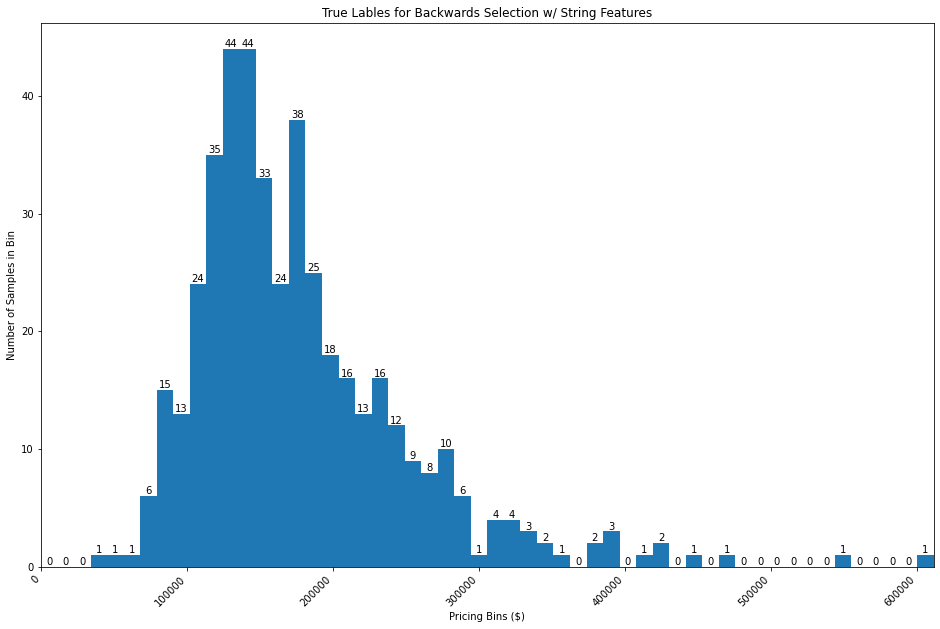

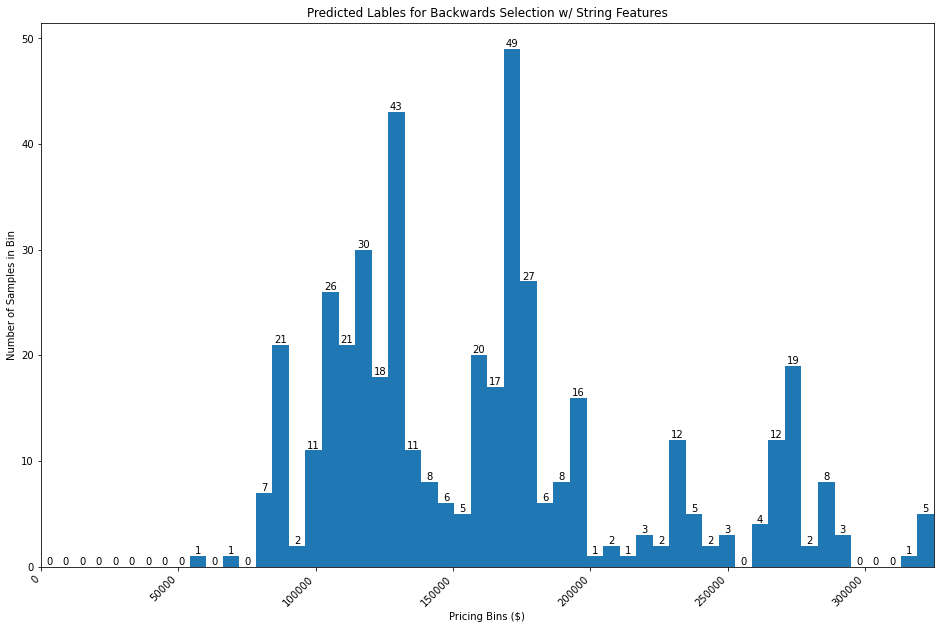

In [5]:
## True Labels
figure = plt.figure()
figure.set_figwidth(16)
figure.set_figheight(10)
counts, edges, bars = plt.hist(testLables_BackSelect,bins = (int) (BackSelect_model.classes_.shape[0]/10),range = (0,testLables_BackSelect.max()))
plt.bar_label(bars)

plt.xlabel('Pricing Bins ($)')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Number of Samples in Bin')
plt.title("True Lables for Backwards Selection w/ String Features")
plt.xlim([0,testLables_BackSelect.max()])
plt.show()


## Predicte Labels
figure = plt.figure()
figure.set_figwidth(16)
figure.set_figheight(10)
counts, edges, bars = plt.hist(BackSelect_model.predict(testData_BackSelect),bins = (int) (BackSelect_model.classes_.shape[0]/10),range = (0,BackSelect_model.predict(testData_BackSelect).max()))
plt.bar_label(bars)

plt.xlabel('Pricing Bins ($)')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Number of Samples in Bin')
plt.title("Predicted Lables for Backwards Selection w/ String Features")
plt.xlim([0,BackSelect_model.predict(testData_BackSelect).max()])
plt.show()

$\underline{\large{\textbf{Histograms of True and Predicted Lables for Backwards Selection w/o String Features}}}$

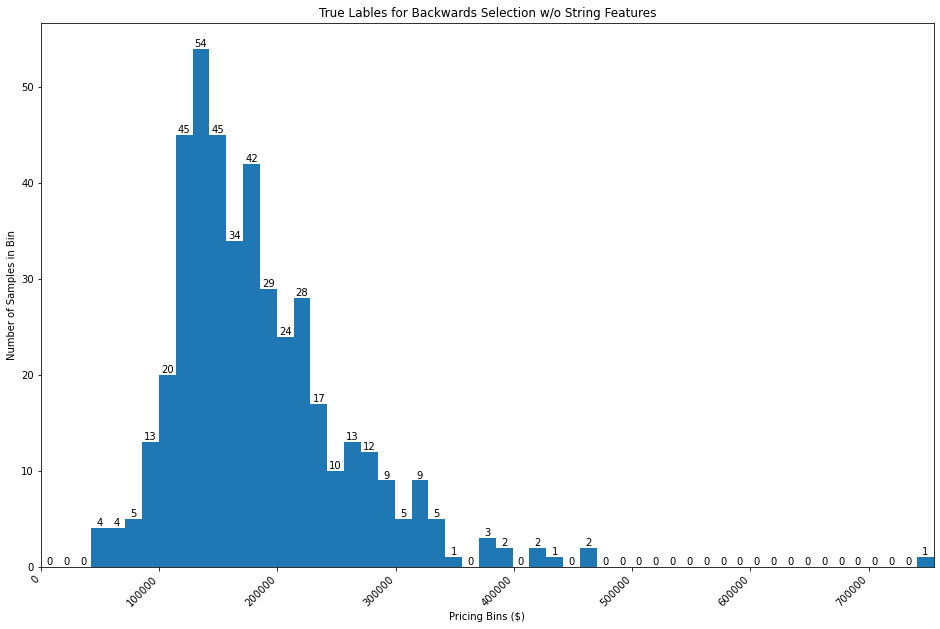

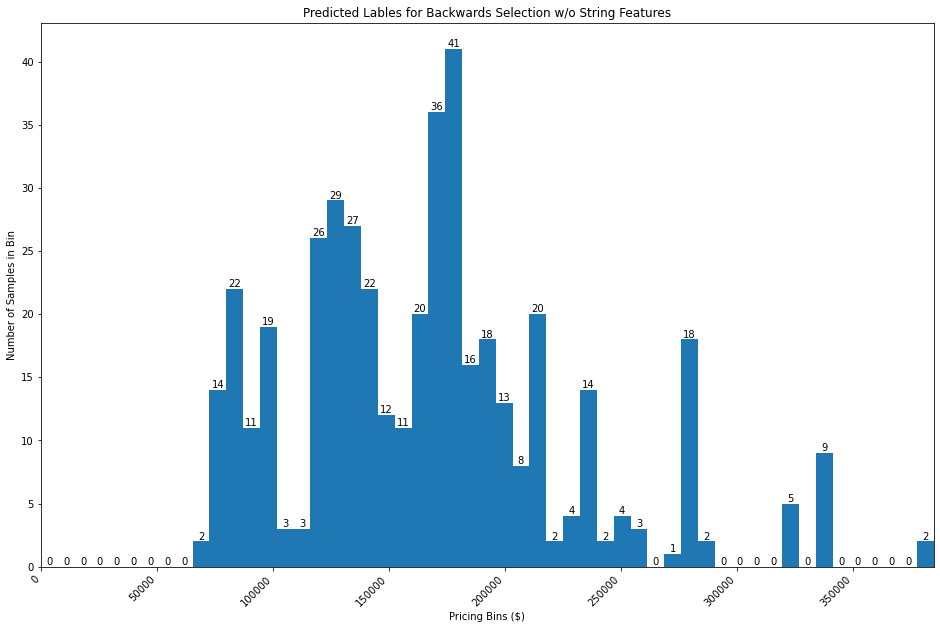

In [6]:
## Backwards Selection w/o String Features
figure = plt.figure()
figure.set_figwidth(16)
figure.set_figheight(10)
counts, edges, bars = plt.hist(testLables_BackSelect_NoStrings,bins = (int) (NoStrings_model.classes_.shape[0]/10),range = (0,testLables_BackSelect_NoStrings.max()))
plt.bar_label(bars)

plt.xlabel('Pricing Bins ($)')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Number of Samples in Bin')
plt.title("True Lables for Backwards Selection w/o String Features")
plt.xlim([0,testLables_BackSelect_NoStrings.max()])
plt.show()


## Backwards Selection w/o String Features
figure = plt.figure()
figure.set_figwidth(16)
figure.set_figheight(10)
counts, edges, bars = plt.hist(NoStrings_model.predict(testData_BackSelect_NoStrings),bins = (int) (NoStrings_model.classes_.shape[0]/10),range = (0,NoStrings_model.predict(testData_BackSelect_NoStrings).max()))
plt.bar_label(bars)

plt.xlabel('Pricing Bins ($)')
plt.xticks(rotation=45, ha="right")
plt.ylabel('Number of Samples in Bin')
plt.title("Predicted Lables for Backwards Selection w/o String Features")
plt.xlim([0,NoStrings_model.predict(testData_BackSelect_NoStrings).max()])
plt.show()

$\underline{\large{\textbf{Ridge Regression Model}}}$

In [9]:
BackSelect_Accuracy_Avg = 0
NoStrings_Accuracy_Avg = 0
for j in range(30):
    ## Split data into training and testing data sets
    #Training Data
    trainInd_BackSelect = np.random.choice(BackSelect_20_Data.shape[0], (int) (.7*BackSelect_20_Data.shape[0]), replace=False)
    trainInd_BackSelect_NoStrings = np.random.choice(BackSelect_20_NoStrings_Data.shape[0], (int) (.7*BackSelect_20_NoStrings_Data.shape[0]), replace=False)

    trainData_BackSelect = usableData_BackSelect[trainInd_BackSelect]
    trainData_BackSelect_NoStrings = usableData_BackSelect_NoStrings[trainInd_BackSelect_NoStrings]

    trainLables_BackSelect = true_labels[trainInd_BackSelect]
    trainLables_BackSelect_NoStrings = true_labels[trainInd_BackSelect_NoStrings]
    #Test Data
    testInd_BackSelect = [i for i in range(BackSelect_20_Data.shape[0]) if i not in trainInd_BackSelect]
    testInd_BackSelect_NoStrings = [i for i in range(BackSelect_20_NoStrings_Data.shape[0]) if i not in trainInd_BackSelect_NoStrings]

    testData_BackSelect = usableData_BackSelect[testInd_BackSelect]
    testData_BackSelect_NoStrings = usableData_BackSelect_NoStrings[testInd_BackSelect_NoStrings]

    testLables_BackSelect = true_labels[testInd_BackSelect]
    testLables_BackSelect_NoStrings = true_labels[testInd_BackSelect_NoStrings]
    
    
    ### Gaussian Naive-Bayes
    ## Backward Selection Data
    BackSelect_model = Ridge(alpha=.5)
    BackSelect_model.fit(trainData_BackSelect, trainLables_BackSelect)
    BackSelect_Accuracy_Avg += BackSelect_model.score(testData_BackSelect,testLables_BackSelect)
    BackSelect_Error_Avg += mean_squared_error(testLables_BackSelect, BackSelect_model.predict(testData_BackSelect), squared=False)
    ## Backward Selection Data Without Strings
    NoStrings_model = Ridge(alpha=.5)
    NoStrings_model.fit(trainData_BackSelect_NoStrings, trainLables_BackSelect_NoStrings)
    NoStrings_Accuracy_Avg += NoStrings_model.score(testData_BackSelect_NoStrings,testLables_BackSelect_NoStrings)
    NoStrings_Error_Avg += mean_squared_error(testLables_BackSelect_NoStrings, NoStrings_model.predict(testData_BackSelect_NoStrings), squared=False)

BackSelect_Accuracy_Avg /= .3
NoStrings_Accuracy_Avg /= .3

BackSelect_Error_Avg /= 30
NoStrings_Error_Avg /= 30

print("Average Accuracy of Ridge Regression after 30 Iterations: \n\tFull Data Set : %.2f \n\tNo String Features : %.2f" % (BackSelect_Accuracy_Avg,NoStrings_Accuracy_Avg))
print("Average RMSE of Gaussian Naive_Bayes after 30 Iterations: \n\tFull Data Set : %.2f \n\tNo String Features : %.2f" % (BackSelect_Error_Avg,NoStrings_Error_Avg))

Average Accuracy of Ridge Regression after 30 Iterations: 
	Full Data Set : 75.10 
	No String Features : 75.63
Average RMSE of Gaussian Naive_Bayes after 30 Iterations: 
	Full Data Set : 79506.79 
	No String Features : 79983.95
